# COVID-19: Dagelijks nieuwe bevestigde gevallen

Om de evolutie van de uitbraak van de verschillende landen te bestuderen gaan we het voorschrijdend wekelijks gemiddelde van elk land berekenen en visualiseren. Eerst laden we de data in vanuit de dataset die publiek gemaakt wordt door de CSSE van Johns Hopkins University. Deze data wordt elke dag bijgewerkt.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import urllib.request

# Data inlezen, wordt dagelijks geupdate door de CSSE van Johns Hopkins University
data = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
cases_df = pd.read_csv(data, delimiter=',')

rows, cols = cases_df.shape

print(f'Er zijn {rows} rijen en {cols} kolommen in de dataset.')
cases_df.head(5)

Er zijn 264 rijen en 92 kolommen in de dataset.


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,484,521,555,607,665,714,784,840,906,933
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,409,416,433,446,467,475,494,518,539,548
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,583,601,601,638,646,659,673,673,696,704
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,24


Vervolgens gaan we de relevante gegevens die voor ons van belang zijn uit de dataset gaan filteren.

In [2]:
# Enkel de gewenste landen overhouden
countries = ['Belgium', 'China', 'Singapore', 'Italy', 'US', 'Netherlands']

# Overbodige kolommen verwijderen of hernoemen
cases_df = cases_df[cases_df['Country/Region'].isin(countries)]
cases_df = cases_df.drop(['Province/State', 'Lat', 'Long'], axis=1)
cases_df = cases_df.rename(columns={'Country/Region': 'Country'})

In [3]:
# Aggregeren per land en telkens de som nemen over alle regios binnen dat land
cases_df = cases_df.groupby(['Country']).sum()
cases_df = cases_df.T
cases_df

Country,Belgium,China,Italy,Netherlands,Singapore,US
1/22/20,0,548,0,0,0,1
1/23/20,0,643,0,0,1,1
1/24/20,0,920,0,0,3,2
1/25/20,0,1406,0,0,3,2
1/26/20,0,2075,0,0,4,5
...,...,...,...,...,...,...
4/14/20,31119,83306,162488,27580,3252,607670
4/15/20,33573,83356,165155,28316,3699,636350
4/16/20,34809,83403,168941,29383,4427,667801
4/17/20,36138,83760,172434,30619,5050,699706


## Voortschrijdend wekelijks gemiddelde

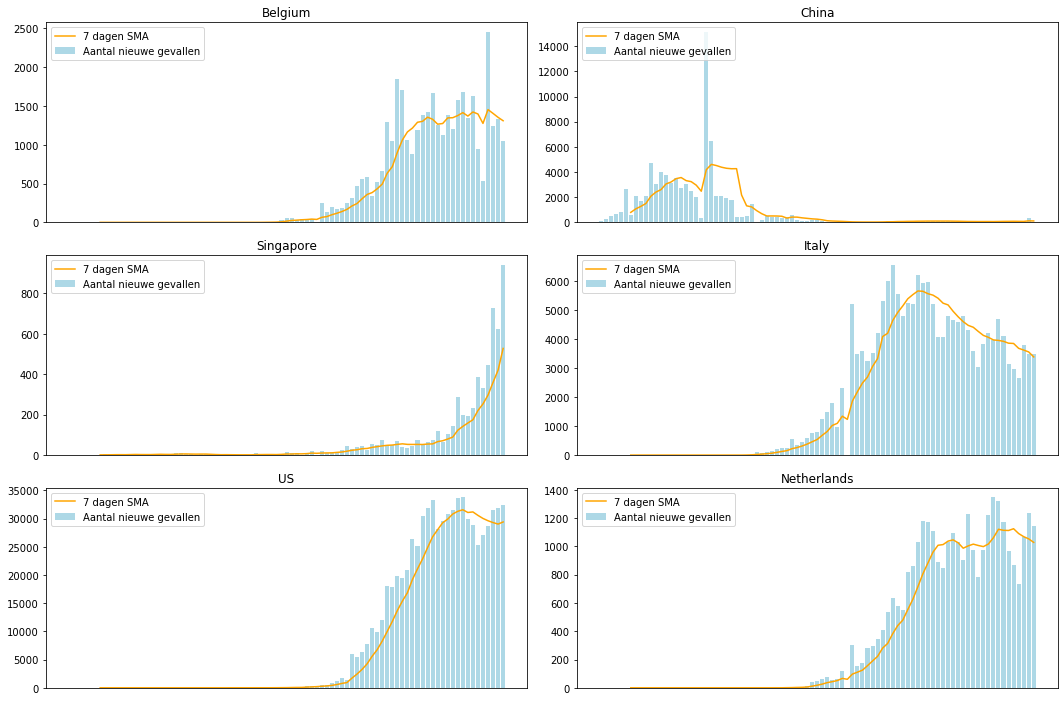

In [4]:
plt.figure(figsize=(15,10))
for i, country in enumerate(countries):
    # Bepaal het aantal nieuwe bevestigde gevallen
    cases_df_c = cases_df
    cases_df_c['Diff'] = cases_df_c[country].diff()

    # Bepaal telkens de Simple Moving Average van de voorbije week
    cases_df_c['SMA_7'] = cases_df_c.Diff.rolling(window=7).mean()

    # Plot beide kolommen in dezelfde grafiek
    plt.subplot(3,2, 1 + i)
    plt.title(country)
    plt.tight_layout()
    plt.bar(np.arange(len(cases_df_c['Diff'])), height=cases_df_c['Diff'], label='Aantal nieuwe gevallen', color='lightblue')
    plt.plot(cases_df_c['SMA_7'], label='7 dagen SMA', color='orange')
    plt.legend(loc='upper left')
    plt.xticks([])